In [2]:
import pandas as pd

import spacy
from spacy import displacy

from tqdm import tqdm
tqdm.pandas()

In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
articles = !ls -ltr *_articles.csv | awk '{print $9}'

In [5]:
articles

['cnn_articles.csv',
 'abc_articles.csv',
 'cbs_articles.csv',
 'nbc_articles.csv',
 'npr_articles.csv',
 'nyt_articles.csv',
 'usat_articles.csv',
 'wapo_articles.csv',
 'politico_articles.csv',
 'propub_articles.csv',
 'lat_articles.csv']

## Apply NER on all the articles

In [6]:
def get_names(row):
    full_names = set()
    try:
        for ent in nlp(row).ents:
            # check if ent is a full name
            if ent.label_ == 'PERSON' and len(ent.text.split()) > 1:
                full_names.add(ent.text)
    except:
        pass
    return list(full_names)
        

def get_names_from_articles(file):
    df = pd.read_csv(file)
    print(f"Applying NER to get names for {file}")
    df['names_in_article'] = df['text'].progress_apply(lambda x: get_names(x))
    print(f"writing to csv for {file}")
    df[['title','authors','names_in_article']].to_csv(f"{file.split('.')[0]}_w_names.csv",index=False)

In [7]:
for a in articles:
    get_names_from_articles(a)

Applying NER to get names for cnn_articles.csv


100%|██████████| 32958/32958 [1:11:46<00:00,  7.65it/s]  


writing to csv for cnn_articles.csv
Applying NER to get names for abc_articles.csv


100%|██████████| 62738/62738 [14:59<00:00, 69.75it/s]  


writing to csv for abc_articles.csv
Applying NER to get names for cbs_articles.csv


100%|██████████| 37907/37907 [1:09:01<00:00,  9.15it/s]


writing to csv for cbs_articles.csv
Applying NER to get names for nbc_articles.csv


100%|██████████| 17968/17968 [33:22<00:00,  8.97it/s]  


writing to csv for nbc_articles.csv
Applying NER to get names for npr_articles.csv


100%|██████████| 15108/15108 [46:31<00:00,  5.41it/s] 


writing to csv for npr_articles.csv
Applying NER to get names for nyt_articles.csv


100%|██████████| 26738/26738 [33:34<00:00, 13.27it/s]  


writing to csv for nyt_articles.csv
Applying NER to get names for usat_articles.csv


100%|██████████| 40637/40637 [1:55:25<00:00,  5.87it/s]  


writing to csv for usat_articles.csv
Applying NER to get names for wapo_articles.csv


100%|██████████| 33764/33764 [1:27:46<00:00,  6.41it/s]  


writing to csv for wapo_articles.csv
Applying NER to get names for politico_articles.csv


100%|██████████| 2456/2456 [05:24<00:00,  7.57it/s]


writing to csv for politico_articles.csv
Applying NER to get names for propub_articles.csv


100%|██████████| 559/559 [04:23<00:00,  2.12it/s]


writing to csv for propub_articles.csv
Applying NER to get names for lat_articles.csv


100%|██████████| 19510/19510 [59:53<00:00,  5.43it/s]  


writing to csv for lat_articles.csv


## Save all the author names

In [44]:
def get_name(text):
    name = ''
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'PERSON' and len(ent.text.split()) > 1:
            name = ent.text
    return name

In [54]:
def save_authors(file):
    df = pd.read_csv(file)
    print(f"Processing {file}")
    channel = file.split("_")[0]
    merged_df = pd.DataFrame({'full_name': ','.join(df['authors'].dropna()).split(",")})
    merged_df.drop_duplicates(inplace=True)
    merged_df['full_name'] = merged_df['full_name'].str.replace(r'/.*', '', regex=True)
    merged_df['full_name'] = merged_df['full_name'].str.replace(r'\n.*', '', regex=True)
    merged_df['full_name'] = merged_df['full_name'].str.replace("[^a-zA-Z' -]", '', regex=True)
    merged_df = merged_df.drop(merged_df[merged_df['full_name'].str.len() < 2].index)
    merged_df['full_name'] = merged_df['full_name'].progress_apply(lambda x: get_name(x))
    print(f"Writing author names for {channel}")
    merged_df.dropna(inplace=True)
    merged_df.drop_duplicates(inplace=True)
    merged_df.to_csv(f'{channel}_author_names.csv',index=False)

In [26]:
ner_results = !ls -ltr *_w_names.csv | awk '{print $9}'

In [27]:
ner_results

['cnn_articles_w_names.csv',
 'abc_articles_w_names.csv',
 'cbs_articles_w_names.csv',
 'nbc_articles_w_names.csv',
 'npr_articles_w_names.csv',
 'nyt_articles_w_names.csv',
 'usat_articles_w_names.csv',
 'wapo_articles_w_names.csv',
 'politico_articles_w_names.csv',
 'propub_articles_w_names.csv',
 'lat_articles_w_names.csv']

In [55]:
for r in ner_results:
    save_authors(r)

Processing cnn_articles_w_names.csv


100%|██████████| 9080/9080 [01:14<00:00, 122.50it/s]


Writing author names for cnn
Processing abc_articles_w_names.csv


100%|██████████| 27/27 [00:00<00:00, 115.85it/s]


Writing author names for abc
Processing cbs_articles_w_names.csv


100%|██████████| 1285/1285 [00:15<00:00, 83.23it/s] 


Writing author names for cbs
Processing nbc_articles_w_names.csv


100%|██████████| 3246/3246 [00:41<00:00, 77.54it/s] 


Writing author names for nbc
Processing npr_articles_w_names.csv


100%|██████████| 4375/4375 [00:33<00:00, 128.80it/s]


Writing author names for npr
Processing nyt_articles_w_names.csv


100%|██████████| 4637/4637 [00:41<00:00, 110.79it/s]


Writing author names for nyt
Processing usat_articles_w_names.csv


100%|██████████| 2533/2533 [00:20<00:00, 123.59it/s]


Writing author names for usat
Processing wapo_articles_w_names.csv


100%|██████████| 3748/3748 [00:32<00:00, 116.55it/s]


Writing author names for wapo
Processing politico_articles_w_names.csv


100%|██████████| 171/171 [00:01<00:00, 87.44it/s]


Writing author names for politico
Processing propub_articles_w_names.csv


100%|██████████| 608/608 [00:04<00:00, 121.85it/s]


Writing author names for propub
Processing lat_articles_w_names.csv


100%|██████████| 2992/2992 [00:28<00:00, 106.57it/s]


Writing author names for lat


In [56]:
authors_csv = !ls -ltr *_author_names.csv | awk '{print $9}'

In [57]:
authors_csv

['cnn_author_names.csv',
 'abc_author_names.csv',
 'cbs_author_names.csv',
 'nbc_author_names.csv',
 'npr_author_names.csv',
 'nyt_author_names.csv',
 'usat_author_names.csv',
 'wapo_author_names.csv',
 'politico_author_names.csv',
 'propub_author_names.csv',
 'lat_author_names.csv']

In [109]:
def add_channel(file):
    df = pd.read_csv(file)
    df['channel'] = file.split("_")[0]
    return df

def merge_all(files, to_file):
    dataframes = [add_channel(file) for file in files]
    merged_df = pd.concat(dataframes, ignore_index=True)
    merged_df.to_csv(to_file, index=False)

In [110]:
merge_all(authors_csv,"all_authors.csv")

## Save all names mentioned in articles by channel

In [106]:
def save_mentioned_names(file):
    df = pd.read_csv(file)
    print(f"Processing {file}")
    channel = file.split("_")[0]
    merged_df = pd.DataFrame({'full_name': ','.join(df['names_in_article'].dropna()).split(",")})
    merged_df.drop_duplicates(inplace=True)
    merged_df['full_name'] = merged_df['full_name'].str.replace(r'/.*', '', regex=True)
    merged_df['full_name'] = merged_df['full_name'].str.replace(r'\n.*', '', regex=True)
    merged_df['full_name'] = merged_df['full_name'].str.replace(r"^'|'$", '', regex=True)
    merged_df['full_name'] = merged_df['full_name'].str.replace("[^a-zA-Z' -]", '', regex=True)
    merged_df['full_name'] = merged_df['full_name'].str.strip()
    merged_df['full_name'] = merged_df['full_name'].str.strip("'")
    merged_df = merged_df.drop(merged_df[merged_df['full_name'].str.len() < 2].index)
    # merged_df['full_name'] = merged_df['full_name'].progress_apply(lambda x: get_name(x))
    print(f"Writing author names for {channel}")
    merged_df.dropna(inplace=True)
    merged_df.drop_duplicates(inplace=True)
    merged_df.to_csv(f'{channel}_mentioned_names.csv',index=False)

In [107]:
for r in ner_results:
    save_mentioned_names(r)

Processing cnn_articles_w_names.csv
Writing author names for cnn
Processing abc_articles_w_names.csv
Writing author names for abc
Processing cbs_articles_w_names.csv
Writing author names for cbs
Processing nbc_articles_w_names.csv
Writing author names for nbc
Processing npr_articles_w_names.csv
Writing author names for npr
Processing nyt_articles_w_names.csv
Writing author names for nyt
Processing usat_articles_w_names.csv
Writing author names for usat
Processing wapo_articles_w_names.csv
Writing author names for wapo
Processing politico_articles_w_names.csv
Writing author names for politico
Processing propub_articles_w_names.csv
Writing author names for propub
Processing lat_articles_w_names.csv
Writing author names for lat


In [108]:
mentioned_csv = !ls -ltr *_mentioned_names.csv | awk '{print $9}'

In [111]:
mentioned_csv

['cnn_mentioned_names.csv',
 'abc_mentioned_names.csv',
 'cbs_mentioned_names.csv',
 'nbc_mentioned_names.csv',
 'npr_mentioned_names.csv',
 'nyt_mentioned_names.csv',
 'usat_mentioned_names.csv',
 'wapo_mentioned_names.csv',
 'politico_mentioned_names.csv',
 'propub_mentioned_names.csv',
 'lat_mentioned_names.csv']

In [112]:
merge_all(mentioned_csv,"all_mentioned_names.csv")

In [113]:
!du -sh all_*.csv

332K	all_authors.csv
9.3M	all_mentioned_names.csv


## stats by channel

In [114]:
df = pd.read_csv("all_mentioned_names.csv")

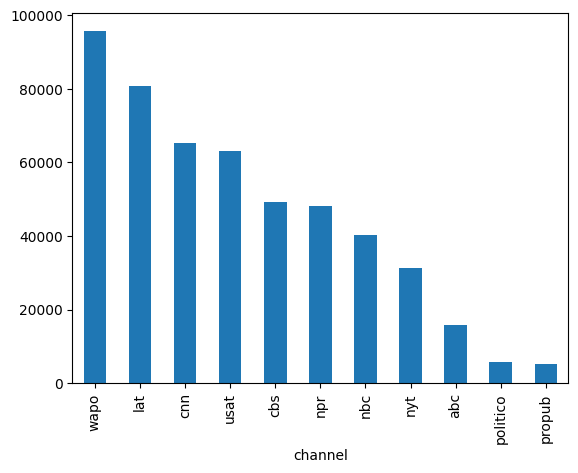

In [130]:
df['channel'].value_counts().plot(kind='bar');

In [131]:
df = pd.read_csv("all_authors.csv")

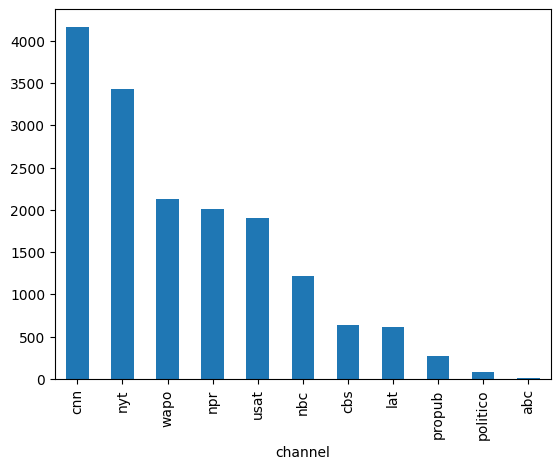

In [132]:
df['channel'].value_counts().plot(kind='bar');